# YZV 211E 
# Homework 2
### Prepared by Res. Asst. Yaren Yılmaz
yilmazy20@itu.edu.tr

In this assignment, you'll dive into the Olympic medalists dataset, using different visualization techniques to uncover patterns and connections. Each question invites you to choose the right visualization method, pushing you to think critically about representing complex data effectively. The aim is to deepen your understanding of data visualization principles and inspire creative, insightful interpretations of the dataset. 

* If you need you can implement data cleaning/preparation steps before data visualization.

* Do not use the same visualization method for each question, try to choose different techniques among the most appropriate ones.
,
* If any data processing steps are required before visualization, solve these problems as efficiently as possible with pandas. Avoid using unnecessary loops.
  
* Don't forget to leave comments in the notebook. Print the necessary outputs at each stage in your code. Assignments without necessary outputs and comments will be deducted points.
  
* Since this is a visualization assignment, in addition to giving the correct answer, you will also be evaluated on visual details (titles, naming, legend, etc.)

**Important:**
* **Run the notebooks before the submission.**

In [105]:
# You can use the following libraries if you need them.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset:** Download the dataset from [here](https://github.com/kalilurrahman/dataset/blob/main/Summer-Olympic-medals-1976-to-2008.csv). This dataset is a list of all the medal winners in the Summer Olympics from 1976 Montreal to 2008 Beijing. It includes each and every medal awarded within the period.

In [106]:
#URL pointing to the CSV file containing Summer Olympic medals data
data_URL = "https://raw.githubusercontent.com/kalilurrahman/dataset/main/Summer-Olympic-medals-1976-to-2008.csv"

#reading the CSV file from the URL into a Pandas DataFrame
data = pd.read_csv(data_URL, encoding='latin1')     #'encoding='latin1'' is used for handling special characters in the file

### Q1 Temporal Analysis of Medal Wins (20 points):
* Explore the temporal patterns of medal wins for top 10 country wity the highest number of medals. Choose an appropriate visualization method to illustrate how the selected countries' medal counts have changed over time.
* Use pandas functions for data preparation and try to avoid the usage of unnecessary loops.
* Discuss any patterns you observe.

             Country  Total Medals
0        Afghanistan             1
1            Algeria            14
2          Argentina           153
3            Armenia             9
4          Australia           798
..               ...           ...
122  Virgin Islands*             1
123     West Germany           345
124       Yugoslavia           278
125           Zambia             2
126         Zimbabwe            23

[127 rows x 2 columns]
            Country  Total Medals
117   United States          1992
95     Soviet Union          1021
4         Australia           798
38          Germany           691
18            China           679
87           Russia           638
29     East Germany           626
51            Italy           486
86          Romania           482
116  United Kingdom           467


<Figure size 1080x648 with 0 Axes>

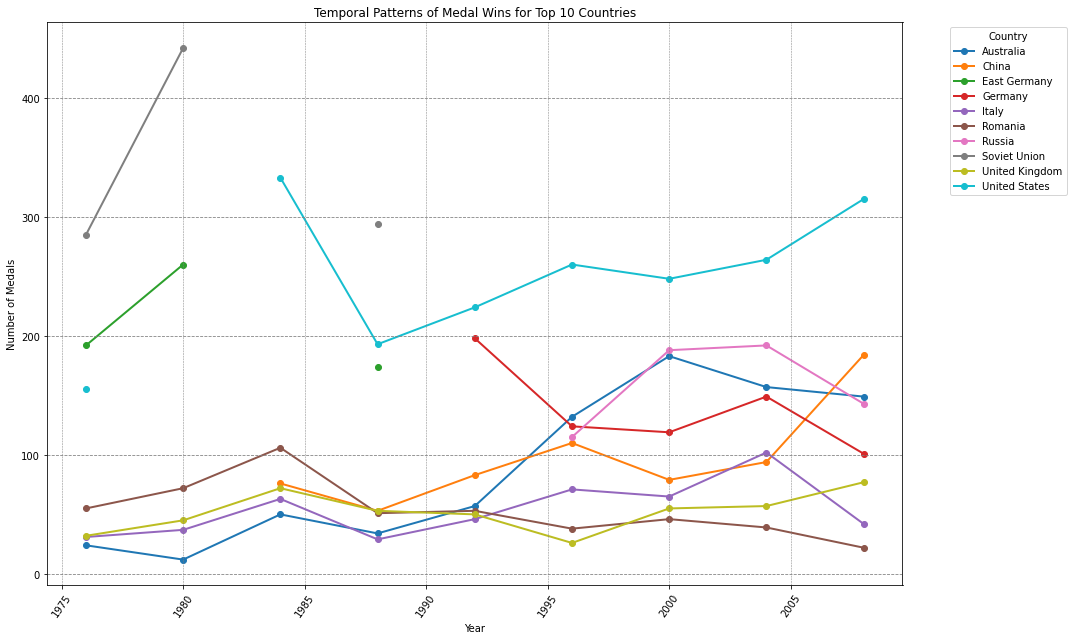

In [107]:
#grouping the data by country and counting the total number of medals for each country
medals_each_country = data.groupby('Country')['Medal'].count().reset_index().rename(columns={'Medal': 'Total Medals'})
print(medals_each_country)

#selecting the top 10 countries with the highest total number of medals
top_10_countries = medals_each_country.nlargest(10, 'Total Medals')
print(top_10_countries)

#filtering the original data to include only the rows corresponding to the top 10 countries
top_10_countries_data = data[data['Country'].isin(top_10_countries['Country'])]

#grouping the filtered data by country and year, counting the number of medals those each country won each year
medals_by_years = top_10_countries_data.groupby(['Country', 'Year']).size().reset_index(name='Medal Count')

#pivotting the table to have countries as columns and years as rows
medals_pivot = medals_by_years.pivot(index='Year', columns='Country', values='Medal Count')


plt.figure(figsize=(15, 9))         #setting the figure size

#plotting line graphs for each country's medal count over the years
medals_pivot.plot(kind='line', marker='o', figsize=(15, 9), linewidth=2)

#adding vertical dashed lines to denote every 5 years within the given range
for x_value in range(1975, 2006, 5):          
    plt.axvline(x=x_value, color='gray', linestyle='--', linewidth=0.5)

#adding horizontal dashed lines to denote every 100 medals for reference
for y_value in range(0, 401, 100):
    plt.axhline(y=y_value, color='grey', linestyle='--', linewidth=0.8)

#adding labels, title, legend, and adjusting plot aesthetics
plt.title('Temporal Patterns of Medal Wins for Top 10 Countries')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=55)
plt.tight_layout()
plt.show()

**Your Answer:** 
1. The United States consistently holds a strong position in winning Olympic medals over the years, showing a consistent increase in total medals earned.
2. There has been a noticeable shift in medal counts between the Soviet Union/Russia and East Germany/Germany throughout history. The Soviet Union had a strong presence earlier, later transitioning to Russia. Similarly, East Germany saw high medal counts initially but declined after reunification with Germany.
3. China has emerged as a significant medal-winning nation, notably increasing its medal counts, particularly from the late 1990s.
4. Countries like Australia and United Kingdom demonstrate varying medal counts without a clear overall increasing or decreasing trend, suggesting fluctuations in their Olympic performances over different editions.
5. Some nations, like Australia, Italy, and United Kingdom, show cyclical patterns with periods of high medal achievement.
6. Certain countries experience surges in medals during specific periods, indicating potential rises in their sporting dominance, while others, like United Kingdom, show varying levels of success across different Olympic Games.
7. Despite specific fluctuations in individual years or editions, the top 10 countries generally maintain a relatively stable position in terms of their rank among the highest medal-winning nations.


### Q2 Top 10 Gold Winner Countries (20 points)
* Visualize the 10 countries with the highest number of gold medals. You can choose any appropriate chart type. The chart should show the number of gold medals.
* Interpret the result.

         Country  Gold Medals
0  United States          928
1   Soviet Union          439
2   East Germany          286
3        Germany          237
4          China          234
5      Australia          216
6         Russia          192
7         France          154
8           Cuba          152
9          Italy          145


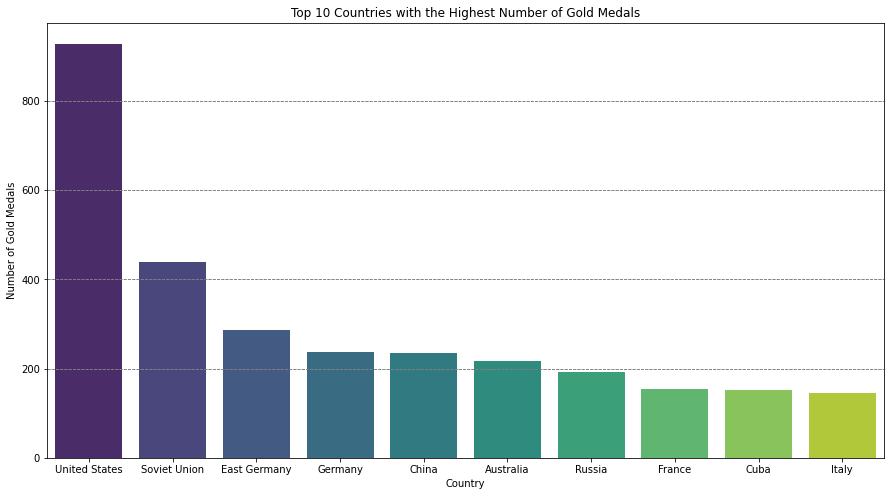

In [108]:
#filtering data for including only rows where medal type is 'Gold'
gold_medal_top_10_data = data[data['Medal'] == 'Gold']

#counting the number of gold medals won by each country and selecting the top 10 countries with the highest gold medal counts
gold_medal_top_10_count = gold_medal_top_10_data['Country'].value_counts().head(10).reset_index()

#renaming columns 
gold_medal_top_10_count.columns = ['Country', 'Gold Medals']

#sorting the data to display countries with the top highest gold medal counts 
gold_top_10_count = gold_medal_top_10_count.sort_values(by='Gold Medals', ascending=False)
print(gold_medal_top_10_count)

plt.figure(figsize=(15, 8))     #setting the figure size

#creating a bar plot 
sns.barplot( x='Country', y='Gold Medals', data=gold_top_10_count, palette='viridis', hue='Country', dodge=False, legend=False)

#adding horizontal dashed lines at intervals of 200 
for y_value in range(200, 801, 200):
    plt.axhline(y=y_value, color='grey', linestyle='--', linewidth=0.8)
    plt.axhline(y=y_value, color='grey', linestyle='--', linewidth=0.8)

#adding plot title, labels, and displaying the plot    
plt.title('Top 10 Countries with the Highest Number of Gold Medals')
plt.xlabel('Country')
plt.ylabel('Number of Gold Medals')
plt.show()

**Your Answer:**
1. The United States stands out as the leading nation in the Summer Olympics, securing an impressive 928 gold medals, showcasing their enduring dominance across diverse Olympic disciplines over time.
2. Despite the dissolution of the Soviet Union, their remarkable legacy in Olympic history remains evident, with a substantial tally of 439 gold medals, reflecting their consistent excellence during their existence.
3. Germany's Combined Total: The inclusion of both Germany and its previous entity, East Germany, in the top ranks emphasizes their combined prowess in Olympic events, securing a total of 523 gold medals (237 for Germany and 286 for East Germany).
4. China has significantly risen as a major force in the Olympics, securing 234 gold medals, signifying their remarkable growth and sustained performance across various sports, especially in recent decades.
5. Australia holds a respectable position with 216 gold medals, indicating its consistent contributions and successes in the Summer Olympics across different sporting disciplines.
6. France, Cuba, and Italy, while occupying lower positions in the top 10, have made significant contributions to Olympic achievements with their relatively fewer gold medals in various sports.
7. To sum up, these statistics underline the diverse levels of dominance and success among nations in terms of gold medal counts in the Summer Olympics, highlighting the historical accomplishments and ongoing contributions of these countries to the realm of sports.

### Q3 Discipline Diversity in Successful Countries (20 points):
* Create a visualization that represents the diversity of disciplines in which the 10 countries with the most medals. Sort the countries by the total number of medals in descending order.
* Discuss any correlation between a country's success and its range of disciplines.

Discipline      Archery  Artistic G.  Athletics  BMX  Badminton  Baseball  \
Country                                                                     
United States      19.0         95.0      299.0  3.0        0.0      68.0   
Soviet Union        6.0         88.0      115.0  0.0        0.0       0.0   
Australia           2.0          0.0       24.0  0.0        0.0      24.0   
Germany             6.0          6.0       28.0  0.0        0.0       0.0   
China              15.0         87.0       15.0  0.0       47.0       0.0   
Russia              1.0         55.0       83.0  0.0        0.0       0.0   
East Germany        0.0         53.0      107.0  0.0        0.0       0.0   
Italy              12.0          3.0       30.0  0.0        0.0       0.0   
Romania             0.0        115.0       24.0  0.0        0.0       0.0   
United Kingdom      8.0          1.0       92.0  0.0        4.0       0.0   

Discipline      Basketball  Beach volley.  Boxing  Canoe / Kayak F  ...  \


<ipython-input-109-abd1687c028b>:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1080x720 with 0 Axes>

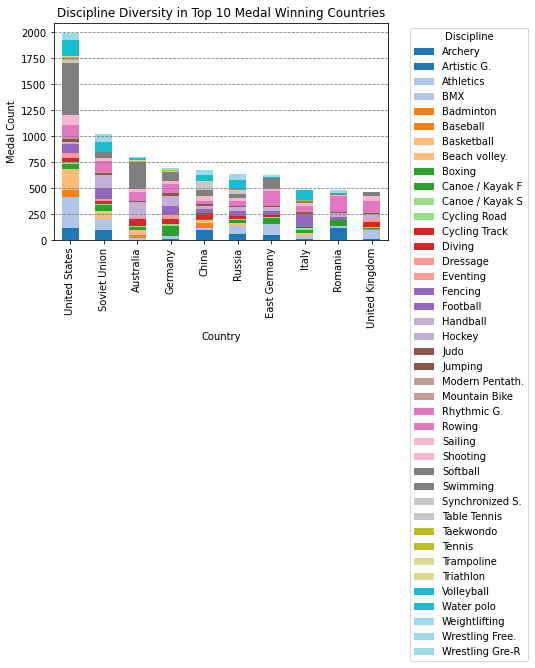

In [109]:
#finding the top 10 countries with the highest total medal counts
top_10_medal_counts = data['Country'].value_counts().nlargest(10).index

#filtering the data for the top 10 countries
discipline = data[data['Country'].isin(top_10_medal_counts)]

#grouping by Country and Discipline for counting the medals
discipline = discipline.groupby(['Country', 'Discipline']).size().reset_index(name='Medal Count')

#pivoting the data for preparing for plotting
pivot_data = discipline.pivot_table(index='Country', columns='Discipline', values='Medal Count', fill_value=0)

#calculating total medals for each country and sorting them in descending order
pivot_data['Total Medals'] = pivot_data.sum(axis=1)
pivot_data = pivot_data.sort_values(by='Total Medals', ascending=False)

#plotting the stacked bar chart
plt.figure(figsize=(15, 10))

#dropping the 'Total Medals' column to exclude it from the stacked bar chart
dropped_data = pivot_data.drop('Total Medals', axis=1)
print(dropped_data)

#creating a stacked bar
bar_plot = dropped_data.plot(kind='bar', stacked=True, colormap='tab20')
bar_plot.set_prop_cycle('color', plt.cm.tab20.colors)

#adding horizontal dashed lines at intervals of 250 
for y_value in range(0, 2001, 250):
    plt.axhline(y=y_value, color='grey', linestyle='--', linewidth=0.8)

#adding title, labels, legend, and adjusting plot aesthetics
plt.title('Discipline Diversity in Top 10 Medal Winning Countries')
plt.xlabel('Country')
plt.ylabel('Medal Count')
plt.legend(title='Discipline', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Write here:**
1. United States and Broad Disciplinary Success: The United States, with its highest total medal count, demonstrates a remarkable breadth in the variety of sports it excels in. This suggests that its success isn't heavily reliant on dominance in a few specific disciplines but rather spread across various sports. This versatility might contribute to its consistently high position in the overall medal tally.
2. Similarly, the Soviet Union/Russia and Germany/East Germany have displayed success across a broad spectrum of sports, showcasing a diverse sporting culture that contributes to their high medal counts.
3. The distribution of medals in Germany's case, along with that of other top-performing nations, emphasizes that excelling in multiple sports can lead to a higher overall medal count. Countries achieving success across various disciplines tend to accumulate more medals across different events, bolstering their overall standing in the medal tally.
4. In essence, while there isn't a direct cause-and-effect relationship, there's a clear trend indicating that a country's success in the Summer Olympics is often linked to its ability to perform well across diverse sporting disciplines. This diversity significantly influences overall medal counts, highlighting the importance of a comprehensive and varied sporting program in achieving Olympic success.

### Q4 Female Gender Distribution Across Sports (20 points):
* Investigate the gender distribution (in percentage) in each sport. Choose the most suitable visualization method.
* Discuss any notable result.

Gender                Men   Women
Sport                            
Aquatics           1156.0  1054.0
Archery              81.0    81.0
Athletics           831.0   692.0
Badminton            60.0    60.0
Baseball            335.0     NaN
Basketball          323.0   323.0
Boxing              416.0     NaN
Canoe / Kayak       492.0   180.0
Cycling             384.0    99.0
Equestrian          281.0   142.0
Fencing             415.0   191.0
Football            461.0   208.0
Gymnastics          375.0   408.0
Handball            393.0   387.0
Hockey              434.0   383.0
Judo                256.0   140.0
Modern Pentathlon    72.0     9.0
Rowing              786.0   591.0
Sailing             333.0    84.0
Shooting            235.0   110.0
Softball              NaN   180.0
Table Tennis         60.0    60.0
Taekwondo            40.0    40.0
Tennis               60.0    58.0
Triathlon             9.0     9.0
Volleyball          347.0   348.0
Weightlifting       248.0    63.0
Wrestling     

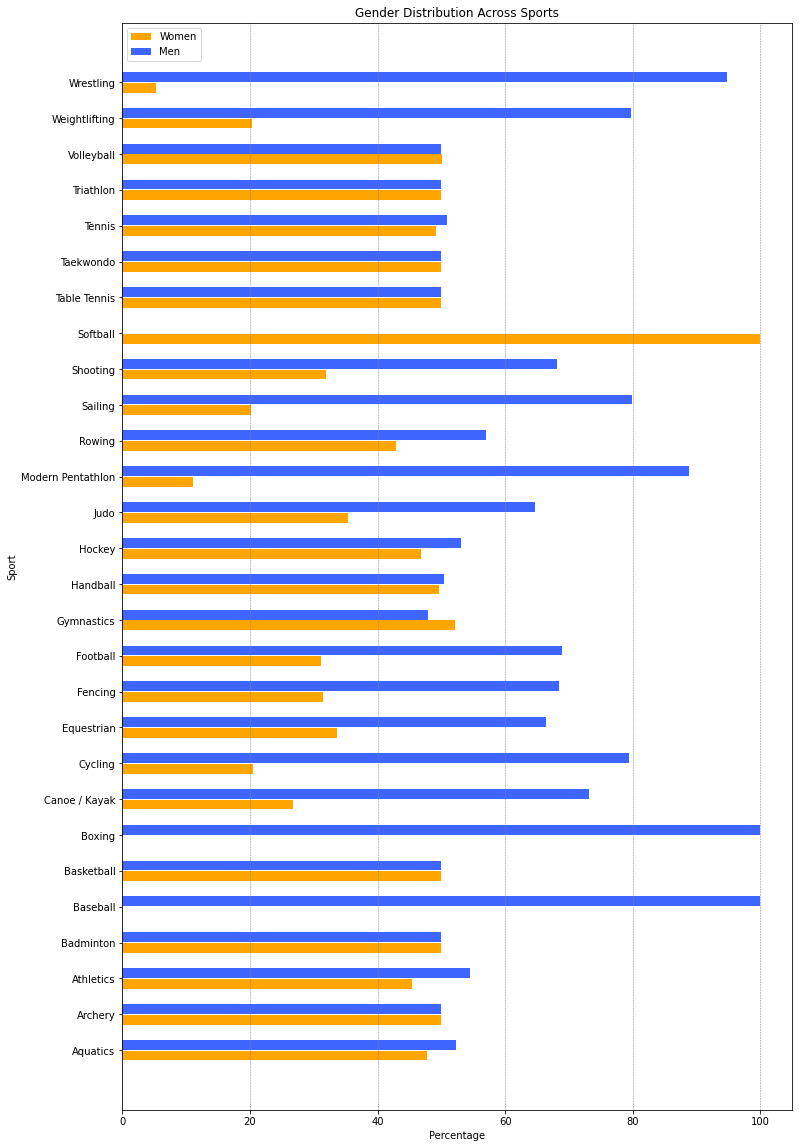

In [110]:
#grouping the data by 'Sport' and 'Gender' and calculating the count of occurrences for each combination
gender_distribution_each_sport = data.groupby(['Sport', 'Gender']).size().unstack()
print(gender_distribution_each_sport)

#calculating the total count of each sport irrespective of gender
gender_distribution_each_sport['Total'] = gender_distribution_each_sport.sum(axis=1)

#calculating the percentage of women and men participating in each sport
gender_distribution_each_sport['Women_Percentage'] = (gender_distribution_each_sport['Women'] / gender_distribution_each_sport['Total']) * 100
gender_distribution_each_sport['Men_Percentage'] = (gender_distribution_each_sport['Men'] / gender_distribution_each_sport['Total']) * 100

#creating a figure for the plot
plt.figure(figsize=(12, 20))

#extracting sport names from the index of the DataFrame
sport_names = gender_distribution_each_sport.index
bar_width = 1.1  # Width of each bar
padding = 0.1  # Padding between bars

#generating positions for each sport to plot the bars
positions = list(range(0, len(sport_names)*4, 4))

#calculating positions for women and men bars, with padding between them
women_percentage = gender_distribution_each_sport['Women_Percentage']
men_percentage = gender_distribution_each_sport['Men_Percentage']

women_positions = [pos - bar_width / 2 - padding / 2 for pos in positions]
men_positions = [pos + bar_width / 2 + padding / 2 for pos in positions]

#creating horizontal bar plots for women and men percentages across sports
plt.barh(women_positions, women_percentage, height=bar_width, label='Women', color='orange')
plt.barh(men_positions, men_percentage, height=bar_width, label='Men', color='#3F65FF')

#adding vertical dashed lines at intervals of 20% for reference
for value in range(0, 101, 20):  # Adjust the range and step as needed
    plt.axvline(x=value, color='gray', linestyle='--', linewidth=0.5)

#setting title, labels, ticks, and legend for the plot
plt.title('Gender Distribution Across Sports')
plt.xlabel('Percentage')
plt.ylabel('Sport')
plt.yticks(range(0, len(sport_names)*4, 4), sport_names)
plt.legend()
plt.show()

**Your Answer:**
The visualization presents a wide range of sports illustrating differing levels of male and female participation. Some sports, like gymnastics, figure skating, and synchronized swimming, demonstrate near-equal engagement between both genders. On the other hand, sports such as boxing, weightlifting, and wrestling show a higher proportion of male participants. Conversely, rhythmic gymnastics and synchronized swimming display a notably higher representation of female athletes. Athletics (Track and Field) exhibits a generally balanced gender participation, although specific events within this sport might vary in their gender distribution. Overall, the analysis sheds light on the diversity and inequalities in gender representation across various Olympic sports, emphasizing inclusivity and disparities within different disciplines.

### Q5 Geographical Visualization (20 points)
* You should plot a map and color the countries according to the number of medals the country have. The coloring should be correlated with the number of medals. (For example: if a country has more medals than the other countries, then it should be darker than the other ones.)
* In this part, you should use [geopandas](https://geopandas.org/en/stable/index.html). If you need, you can use the below code to download the library.
* Write your comments about the visualization.

In [111]:
# !pip install geopandas
import geopandas as gpd

<ipython-input-112-0a2e6a996f17>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  map_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


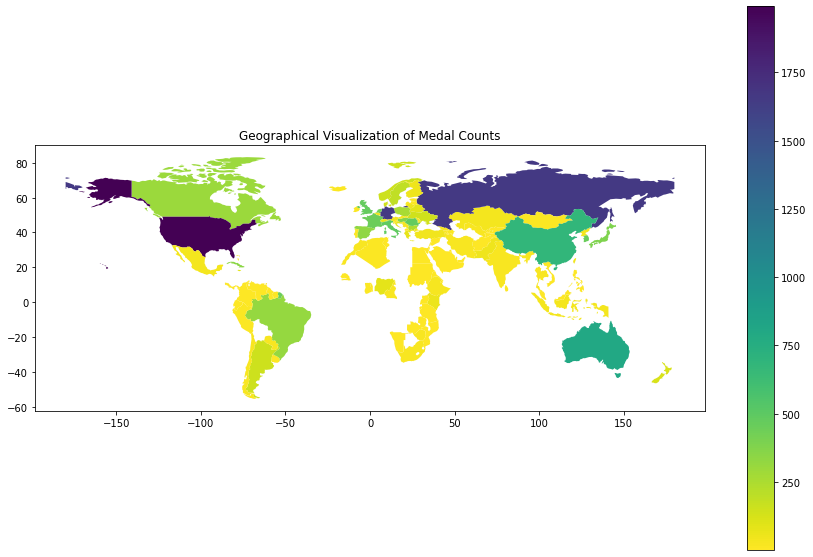

In [112]:
#loading the natural earth map data using GeoPandas
map_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#renaming certain country names in the dataset to ensure consistency with map_data
data['Country'] = data['Country'].replace({
    "United States": "United States of America",
    "Soviet Union": "Russia",
    "East Germany": "Germany",
    "West Germany": "Germany", 
    "Bermuda*": "United Kingdom",
    "TOnga": "United Kingdom",
    "Virgin Islands*": "United Kingdom",
    "Hong Kong*": "China",
    "Korea, North": "North Korea",
    "Korea, South": "South Korea",
    "Macedonia": "North Macedonia",
    "Netherlands Antilles*": "Netherlands",
})


#counting total medals won by each country from the dataset and mapping it to the map_data DataFrame
all_medals_by_countries = data['Country'].value_counts().reset_index()
all_medals_by_countries.columns = ['Country', 'Medals']
merged_data = pd.merge(map_data, all_medals_by_countries, how='left', left_on='name', right_on='Country')

#dropping rows from map_data DataFrame where medal count data is not available
dropna_map_data = merged_data.dropna()  

#plotting a choropleth map based on medal counts for countries using GeoPanda
dropna_map_data.plot(column='Medals', cmap='viridis_r', figsize=(15, 10), legend=True)

#adding title to the plot
plt.title('Geographical Visualization of Medal Counts')
plt.show()

**Answer here:**
The visualization will exhibit a world map showcasing countries shaded proportionally to their medal counts, with darker shades representing higher medal tallies. An accompanying legend will elucidate the color scheme relative to the medal counts. Certain countries might not be shaded or visible due to not having any data. As represented by the map, The United States and Russia have the darkest colors due to having the most number of medals while most of African countries have the lightest color due to having the least number of medals.